# AFS 505 Spring 2023, Unit 2 Project



## Background

This project will cover all aspects of the Data Analytics with Python unit.  To complete the project, follow the instructions at each step in the notebook and add Python code or written explanations as instructed.   Some tasks below will require you to answer with a written response rather than writing code.  Those tasks begin with the words "Explain" or "Write".


## Due Dates

This project requires knoweldge gained throughout the unit. However, waiting until the end of the unit make this project overwhelming.  Instead, as we cover the material required for different sections you are required to check-in the project. This ensures continued progress throuhgout the unit.

Project Check-in dates are 
- Thursday March 2, Sections 1-3
- Thursday March 9, Section 4
- Thursday March 23, Sections 5-6
- Thursday March 31, Completed Project



## How to turn in 
***DO NOT*** sumbit this poject to your GitHub repository.  Instead you will need to submit your check-ins via Canvas.


## Grading
Submission of the project on the check-in dates is worth 5 points per check-in. The prescribed sections must be fully completed, but they need not be correct.   Because grading in this course is subtractive, you only lose points if you do not check-in the project.  After final completion, the project will be graded for completeness and accuracy.  An accurate project is worth 25 points towards your grade.


## Data Introducution

To complete this project you will need to retrieve the "Cover Type Dataset" available at the UC Irvine Machine Learning Repository. You can find information about the dataset as well as the data [here](https://archive.ics.uci.edu/ml/datasets/Covertype).  To download the data, click the link at the top that reads **Data Folder**.  On the resulting page you will find three files for download.  Please download the file named `covtype.data.gz`, and use your preferred decompression utility to uncompress the file.  

Before you can begin with this project, you must familarize yourself with the data.  Please read the `convtype.info` file that is also available for download.  You can either download the file and open with your favorite text editor or [view it in the web browser](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info).

In Summary:

> Natural resource managers responsible for developing ecosystem management strategies require basic descriptive information including inventory data for forested lands to support their decision-making processes.  However, managers generally do not have this type of data for inholdings or neighboring lands that are outside their immediate jurisdiction.  **One method of obtaining this information is through the use of predictive models.**  

> [The purpose of this dataset is for] predicting forest cover type from cartographic variables... The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data... Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 



Here are some hints to help explain some of the data columns:

- Slope:  The angle in degrees of the slope on which the forest cover is growing.  
- Aspect:  The direction the slope is facing in degrees azimuth:  North = 0, East = 90, South = 180, West = 270.
- The columns representing shade contain values from 0 to 255 with 0 meaning no sun and 255 meaning full sun.
- There are 40 columns representing differnet soil types.  See the `convtype.info` file for a listing of these types.  The observations in these 40 columns indicate if cover was: absent = 0, present = 1
- There are 4 columns representing 4 different wilderness areas. The observations in these 4 columns indicate if cover was:  absent = 0, present = 1



## Objective
For this project you will utilize Numpy, Pandas, Matplotlib, Seaborn and Sklearn to create a Supervised Machine learning model that can assist natural resouce managers predict tree cover in neighboring lands.
 


## Tips
1. If you feel that your solution in a cell is too complicated, it probably is.  Check the online documentation and expect there may be shortcuts to do what you want.
2. If you encounter Memory Error or the notebook seems to not execute, you may need to restart the Kernel and re-run the cells.
3. Please contact the instructor if you have questions about this project.  You may ask any question you want!
4. Before turning in your notebook carefully re-read each step to ensure you've followed it correctly.


## Academic Honesty
You must work on your own to complete this project.  You should not work on this project together with other students. If you have questions please ask the instructurs or post them to the Slack channel where every student can see your question and benefit from any answers. You may consult the notebooks provided to you for the class or the online documentation for any of the tools (e.g. Numpy, Pandas, Seaborn, or Sklearn). 

---
## 1. Setup the Notebook
**1a.** Load all the necessary packages and libraries required for the entire notebook using the following (5 pts).

In [1]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder

---
## 2. Import the data
**2a.** First, import the data. Note, it does not have any headers. This is a large dataset so it may  take a minute to load (3 pts).

In [2]:
project = pd.read_csv('../data/covtype.data.gz', delimiter=',', header=None) #read in data as CSV without a header
project.head()

0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  

[5 rows x 55 columns]

In [3]:
project.shape

(581012, 55)

**2b.** Display the first 10 lines of the data (3 pts).

In [4]:
project.head(10)

0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   
5  2579  132   6  300  -15    67  230  237  140  6031  ...   0   0   0   0   
6  2606   45   7  270    5   633  222  225  138  6256  ...   0   0   0   0   
7  2605   49   4  234    7   573  222  230  144  6228  ...   0   0   0   0   
8  2617   45   9  240   56   666  223  221  133  6244  ...   0   0   0   0   
9  2612   59  10  247   11   636  228  219  124  6230  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  
5   0   0   0   0   0   2  
6   0   0   0   0   0   5  
7   0   0   0   0   0   5  
8   0   0   0   0   0   5  
9   0   0   0   0   0   5  

[10 rows x 55 columns]

**2c.** Add appropriate headers to the data frame, using the following array:

```python
headers = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'
           
]
```
(3 pts)

In [5]:
project.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type']
#use .columns function to add colums to 'project' dataframe

**2d.** Display the first 10 lines of data again to confirm the headers are present (3 pts).

In [6]:
project.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points  ...  ST32  ST33  ST34  ST35  ST36  \
0                                6279  ...     0     0     0     0     0   
1                                6225  ...     0     0     0     0     0   
2                                6121  ...     0     0     0     0     0   
3                                6211  ...     0     0     0     0     0   
4                                6172  ...     0     0     0     0     0   
5                                6031  ...     0     0     0     0     0   
6                                6256  ...     0     0     0     0     0   
7                                6228  ...     0     0     0     0     0   
8                                6244  ...     0     0     0     0     0   
9                                6230  ...     0     0     0     0     0   

   ST37  ST38  ST39  ST40  Cover_Type  
0     0     0     0     0           5  
1     0     0     0     0           5  
2     0     0     0     0           2  
3     0     0     0     0           2  
4     0     0     0     0           5  
5     0     0     0     0           2  
6     0     0     0     0           5  
7     0     0     0     0           5  
8     0     0     0     0           5  
9     0     0     0     0           5  

[10 rows x 55 columns]

In [7]:
project.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...           ST32  \
count  581012.000000                       581012.000000  ...  581012.000000   
mean      142.528263                         1980.291226  ...       0.090392   
std        38.274529                         1324.195210  ...       0.286743   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1024.000000  ...       0.000000   
50%       143.000000                         1710.000000  ...       0.000000   
75%       168.000000                         2550.000000  ...       0.000000   
max       254.000000                         7173.000000  ...       1.000000   

                ST33           ST34           ST35           ST36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                ST37           ST38           ST39           ST40  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.000513       0.026803       0.023762       0.015060   
std         0.022641       0.161508       0.152307       0.121791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Cover_Type  
count  581012.000000  
mean        2.051471  
std         1.396504  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         7.000000  

[8 rows x 55 colu

---
## 3. Explore the Data
**3a.** Show the dimensions of the data (3 pts).

In [8]:
project.shape

(581012, 55)

**3b.** Show the datatypes of all of the columns in the data (3 pts).

In [9]:
project.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Rawah                                 int64
Neota                                 int64
Comanche_Peak                         int64
Cache_la_Poudre                       int64
ST1                                   int64
ST2                                   int64
ST3                                   int64
ST4                                   int64
ST5                                   int64
ST6                                   int64
ST7                                   int64
ST8                                   int64
ST9                             

**3c.** Show if the dataset has any missing values (3 pts).

In [10]:
project.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Rawah                                 0
Neota                                 0
Comanche_Peak                         0
Cache_la_Poudre                       0
ST1                                   0
ST2                                   0
ST3                                   0
ST4                                   0
ST5                                   0
ST6                                   0
ST7                                   0
ST8                                   0
ST9                                   0
ST10                                  0
ST11                                  0


**3d.** Show how many rows of data are duplicated (3 pts).

In [11]:
project.duplicated().sum() #None duplicated

0

**3e.** Show how many unique values there are per column (3 pts).

In [12]:
#Ignore this, please. Just playing around. 
for col in project:
    print(project[col],':',project[col].unique().sum())

0         2596
1         2590
2         2804
3         2785
4         2595
          ... 
581007    2396
581008    2391
581009    2386
581010    2384
581011    2383
Name: Elevation, Length: 581012, dtype: int64 : 5647129
0          51
1          56
2         139
3         155
4          45
         ... 
581007    153
581008    152
581009    159
581010    170
581011    165
Name: Aspect, Length: 581012, dtype: int64 : 64980
0          3
1          2
2          9
3         18
4          2
          ..
581007    20
581008    19
581009    17
581010    15
581011    13
Name: Slope, Length: 581012, dtype: int64 : 2211
0         258
1         212
2         268
3         242
4         153
         ... 
581007     85
581008     67
581009     60
581010     60
581011     60
Name: Horizontal_Distance_To_Hydrology, Length: 581012, dtype: int64 : 464589
0           0
1          -6
2          65
3         118
4          -1
         ... 
581007     17
581008     12
581009      7
581010      5
581011    

In [13]:
#Ignore this, please. Just playing around. 
project.Elevation.sum()

1719426752

In [14]:
#Ignore this, please. Just playing around. 
project.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [15]:
#Ignore this, please. Just playing around. 
project.Elevation.nunique()

1978

In [16]:
#Ignore this, please. Just playing around.
for col in project:
    print(project[col].nunique())

1978
361
67
551
700
5785
207
185
255
5827
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
7


In [17]:
for col in project:
    print(col,'Unique:',project[col].nunique())

Elevation Unique: 1978
Aspect Unique: 361
Slope Unique: 67
Horizontal_Distance_To_Hydrology Unique: 551
Vertical_Distance_To_Hydrology Unique: 700
Horizontal_Distance_To_Roadways Unique: 5785
Hillshade_9am Unique: 207
Hillshade_Noon Unique: 185
Hillshade_3pm Unique: 255
Horizontal_Distance_To_Fire_Points Unique: 5827
Rawah Unique: 2
Neota Unique: 2
Comanche_Peak Unique: 2
Cache_la_Poudre Unique: 2
ST1 Unique: 2
ST2 Unique: 2
ST3 Unique: 2
ST4 Unique: 2
ST5 Unique: 2
ST6 Unique: 2
ST7 Unique: 2
ST8 Unique: 2
ST9 Unique: 2
ST10 Unique: 2
ST11 Unique: 2
ST12 Unique: 2
ST13 Unique: 2
ST14 Unique: 2
ST15 Unique: 2
ST16 Unique: 2
ST17 Unique: 2
ST18 Unique: 2
ST19 Unique: 2
ST20 Unique: 2
ST21 Unique: 2
ST22 Unique: 2
ST23 Unique: 2
ST24 Unique: 2
ST25 Unique: 2
ST26 Unique: 2
ST27 Unique: 2
ST28 Unique: 2
ST29 Unique: 2
ST30 Unique: 2
ST31 Unique: 2
ST32 Unique: 2
ST33 Unique: 2
ST34 Unique: 2
ST35 Unique: 2
ST36 Unique: 2
ST37 Unique: 2
ST38 Unique: 2
ST39 Unique: 2
ST40 Unique: 2
Cover_Ty

---
## 4. Clean the Data
### 4.1. Missing Values
**4a.** If the dataset had missing values, determine if you need to clean the data. If so, show the code below. If you do not perform any cleaning indicate why (change the cell to "raw" type to write your explanation)  (3 pts).

### 4.2 Duplicated Data
**4b.** If the dataset had duplicated values, determine if you need to clean the data. If so, show the code below. If not, describe the status of duplicated data in this dataset (change the cell to "raw" type to write your explanation)  (3 pts).

**4c.** Explain if the unique number of values or each of the categorical columns (non numeric and non binary) match what is expected based on the description of the data  (3 pts).

### 4.3 Fix Categorical Data
Some of the columns are categorical (i.e. qualitative).  Remember, just becauase a column contains numbers does not mean it is quantitative. In the online description of the data, the authors stated that the soil types and wilderness areas are qualitative (categorical). You must decide if this is true given the dataset.

**4d.** Write the names of the columns that are categorical (3 pts).

**4e.** Change all categorical columns that were imported as a numeric type to a string type  (3 pts).

In [18]:
#Ignore this, please. Just playing around.
project_categorical = project.loc['Rawah':].astype(str)

In [19]:
for col in ['Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', \
            'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', \
            'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', \
            'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', \
            'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', \
            'ST30', 'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', \
            'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type']:
    project[col] = project[col].astype(str)

**4f.** Confirm that all categorical columns are no longer numeric (3 pts).

In [20]:
project.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Horizontal_Distance_To_Fire_Points     int64
Rawah                                 object
Neota                                 object
Comanche_Peak                         object
Cache_la_Poudre                       object
ST1                                   object
ST2                                   object
ST3                                   object
ST4                                   object
ST5                                   object
ST6                                   object
ST7                                   object
ST8                                   object
ST9       

**4g.** The `Cover_Type` column is a string but appears numeric, and each number represents a unique class of trees. Convert the numeric values to their corresponding string representations. Print the top 10 entries to confirm your replacement worked (5 pts).

In [21]:
project.Cover_Type.head(10)

0    5
1    5
2    2
3    2
4    5
5    2
6    5
7    5
8    5
9    5
Name: Cover_Type, dtype: object

### 4.4 Subset the Data
The dataset is a bit large for this notebook. It will consume too much RAM on your computer.  If we were executing this on a computer with more RAM we might just write a Python script to do the work rather than use a Jupyter notebook.  To reduce the dataset we should subset our data to save resources. 

**4h.** Before we subset the data, let's explore the number of samples per cover type.  For the `Cover_type` column, show the counts of each type of cover, and sort the results from largest to smallest (5 pts).

In [22]:
project.Cover_Type.value_counts() #Already sorted from largest to smallest. Adding .sort_values sorts from smallest to largest

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

**4i.**  The results of the previous cell show that the number of measurements per cover type is imbalanced with the smallest having 2,747 observations and the largest 283,301.  Let's subset the data to only include 2,000 randomly selected samples from each cover type.   We have not covered in class how to do this, so below is a code sample you can use. 
```python
df = df.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)
```
Notice in the line of code above, we first perform a `groupby` operation to organize rows by their cover type. Next, we  call `apply` on each group. With the `apply` function you must provide the name of the function that will be called for each group. In this case, the word `lambda` tells python that we are declaring an "anonymous" in-line function (no `def` line) that takes an argument `x`.  As the apply is executed on each group, the variable `x` contains the data for each group, and is actually a Pandas DataFrame. Hence, we can call `sample` to select 2000 random rows.  The `apply` function returns a new DataFrame containing all selected rows from all groups.  On this data frame we call `reset_index` to renumber the index for all of our rows.

(3 pts)

In [23]:
#Naming the subsampled 'project' dataframe 'subsample'
subsample = project.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)

**4j.** Re-run the same command from task 4f. The results should show an even 2,000 samples of each cover type (3 pts).

In [24]:
subsample.Cover_Type.value_counts() 

1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
Name: Cover_Type, dtype: int64

### 4.5 Tidy or not to Tidy?

You'll notice that this dataset is not tidy!  We have a variable in the headers:  the different soil types.  To tidy this data we would normally melt the soil types into a single column, perhaps named `Soil_Type`. We could then remove all rows where the soil type was not present (i.e. has a value of 0) and drop the melted values column with the absent/present binary value.  

However, as we've learned in class, the Sklearn package which we will use for machine learning cannot handle strings for categorical data.  It wants categorical data reset as numeric values: one for each category. But this only works for ordinal data.  Our soil type data is not ordinal.  If we melted our dataframe, then for machine learning we would need to perform ["One Hot Encoding"](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) to put the `Soil_Type` column dataframe into a format that Sklearn approves of. The end result is a pivot of the dataframe back to what it currently is!  So, even though we should Tidy this dataset, let's leave it as is for Sklearn.

---
## 5. Understand the data
### 5.1  Review Categorical Data

**5a.** Generate a dataframe that contains the number of times we see a soil type present for each cover type.  Show the top 10 rows of the dataframe.

For example:

<table>
    <tr><th></th><th>Cover_Type</th><th>Soil_Type</th><th>Present</th></tr>
    <tr><th>0</th><th>Aspen</th><th>ST02</th><th>53</th></tr>
    <tr><th>1</th><th>Aspen</th><th>ST04</th><th>117</th></tr>
    <tr><th>2</th><th>Aspen</th><th>ST10</th><th>64</th></tr>
    <tr><th>3</th><th>Aspen</th><th>ST11</th><th>148</th></tr>
    <tr><th>4</th><th>Aspen</th><th>ST13</th><th>319</th></tr>
</table>

Hint:
- Start with a reduced dataframe that only contains the 40 soil types + `Cover_Type`
- Melt the data.
- Exclude soil types that are absent.
- Use a `groupby`.

(5 pts)

In [25]:
#start with reduced data set with soiltypes 1 thru 40 and cover type
subsample_reduced = subsample[['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', \
            'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', \
            'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', \
            'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', \
            'ST30', 'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', \
            'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type']]
subsample_reduced.head()

ST1 ST2 ST3 ST4 ST5 ST6 ST7 ST8 ST9 ST10  ... ST32 ST33 ST34 ST35 ST36 ST37  \
0   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0    0  ...    0    1    0    0    0    0   
2   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
3   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
4   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   

  ST38 ST39 ST40 Cover_Type  
0    0    0    0          1  
1    0    0    0          1  
2    0    0    0          1  
3    0    0    0          1  
4    0    0    0          1  

[5 rows x 41 columns]

In [26]:
#melt the data and remove missing data
subsample_melt = subsample_reduced.melt(id_vars='Cover_Type', var_name='Soil_Type', value_name = "Present")
subsample_melt.head(10)

Cover_Type Soil_Type Present
0          1       ST1       0
1          1       ST1       0
2          1       ST1       0
3          1       ST1       0
4          1       ST1       0
5          1       ST1       0
6          1       ST1       0
7          1       ST1       0
8          1       ST1       0
9          1       ST1       0

In [27]:
#remove zeros
subsample_zero = subsample_melt
for col in ['Present']:
    subsample_zero[col] = subsample_zero[col].astype('int64')

In [28]:
subsample_zero['Present'] = subsample_zero['Present'].replace(0, np.nan)
subsample_zero = subsample_zero.dropna()

In [29]:
subsample_zero.head(10)

Cover_Type Soil_Type  Present
4016          3       ST1      1.0
4034          3       ST1      1.0
4039          3       ST1      1.0
4041          3       ST1      1.0
4048          3       ST1      1.0
4075          3       ST1      1.0
4095          3       ST1      1.0
4096          3       ST1      1.0
4097          3       ST1      1.0
4107          3       ST1      1.0

In [30]:
#Shape of melted dataframe without zeros
subsample_zero.shape

(14000, 3)

In [31]:
#Shape of original melted dataframe with zeros as a check
subsample_melt.shape

(560000, 3)

In [32]:
subsample_group = subsample_zero.groupby(['Cover_Type','Soil_Type']).sum()
subsample_group.head(10)

Present
Cover_Type Soil_Type         
1          ST10           7.0
           ST11           8.0
           ST12          21.0
           ST13          23.0
           ST16           3.0
           ST17           2.0
           ST19          23.0
           ST20          44.0
           ST21          12.0
           ST22         261.0

In [33]:
#Ignore this, please.
subsample_zero.groupby(['Cover_Type','Soil_Type']).sum()

Present
Cover_Type Soil_Type         
1          ST10           7.0
           ST11           8.0
           ST12          21.0
           ST13          23.0
           ST16           3.0
...                       ...
7          ST37          25.0
           ST38         594.0
           ST39         536.0
           ST4           13.0
           ST40         345.0

[140 rows x 1 columns]

**5b.** Using the dataframe just created, draw a plot showing the relationship between the cover type and the soil type. Size the points in the plot by the counts. Ensure that the axis ticks and legend are legible. Save the figure to a file named `covtype-soil_type.scatter.png` for viewing (5 pts). 

In [34]:
count = subsample_group['Present'].to_numpy(float)
print(count)

[7.000e+00 8.000e+00 2.100e+01 2.300e+01 3.000e+00 2.000e+00 2.300e+01
 4.400e+01 1.200e+01 2.610e+02 3.090e+02 9.500e+01 1.000e+00 2.000e+00
 8.000e+00 4.070e+02 8.000e+01 1.130e+02 1.890e+02 1.760e+02 2.000e+00
 1.200e+01 8.600e+01 7.800e+01 3.000e+00 3.300e+01 2.000e+00 5.900e+01
 6.000e+01 1.870e+02 1.030e+02 1.700e+01 8.000e+00 1.100e+01 1.000e+01
 3.000e+00 3.100e+01 5.100e+01 1.180e+02 7.200e+01 4.000e+00 2.100e+01
 4.000e+00 4.000e+00 4.890e+02 4.000e+00 1.500e+02 1.050e+02 2.500e+02
 1.800e+02 1.100e+01 1.000e+00 5.000e+00 3.000e+00 2.100e+01 5.000e+00
 6.000e+00 2.000e+00 5.000e+00 1.150e+02 6.420e+02 7.000e+01 2.000e+00
 7.000e+00 8.000e+00 3.500e+01 2.610e+02 1.380e+02 2.000e+00 2.000e+00
 4.600e+02 6.000e+01 1.980e+02 1.270e+02 1.670e+02 3.100e+01 1.080e+02
 3.500e+01 3.010e+02 7.700e+01 7.500e+02 1.260e+02 3.900e+01 2.390e+02
 5.400e+01 1.260e+02 2.790e+02 1.100e+01 1.180e+02 4.300e+01 1.800e+01
 4.800e+01 1.600e+01 1.360e+02 1.500e+01 2.700e+01 4.000e+00 2.520e+02
 4.560

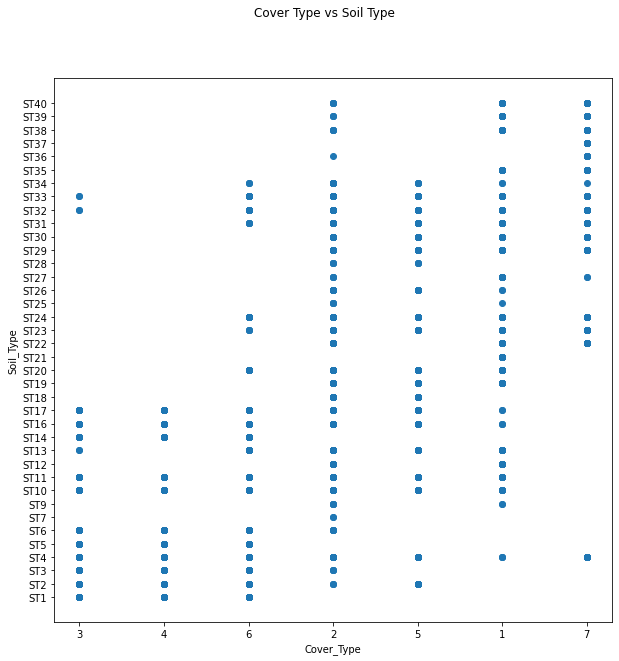

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(subsample_zero['Cover_Type'], subsample_zero['Soil_Type'])
fig.suptitle('Cover Type vs Soil Type')
ax.axes.set_xlabel('Cover_Type')
ax.axes.set_ylabel('Soil_Type')
plt.show()

**5c.** Explain why it is important to review the scatterplot of "Cover_Type" vs. all the soil types (3 pts).

### 5.2 Review the quantitative data
**5d.** Show the basic summary statistics for the quantitiatve data, excluding the 40 binary soil type columns (3 pts).

In [36]:
project.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah', 'Neota', 'Comanche_Peak',
       'Cache_la_Poudre', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type'],
      dtype='object')

In [37]:
project.loc['Elevation':'Horizontal_Distance_To_Fire_Points']
project_quantitative_stats = project.describe()
project_quantitative_stats

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  581012.000000                       581012.000000  
mean      142.528263                         1980.291226  
std        38.274529                         1324.195210  
min         0.000000                            0.000000  
25%       119.000000                         1024.000000  
50%       143.000000                         1710.000000  
75%       168.000000                         2550.000000  
max       254.000000                         7173.000000

**5e.** Use the [hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function of Pandas Dataframes to create a single figure showing the histograms of every quantitative data column excluding the 40 binary soil type columns.  Size the figure to ensure all text is legible. Save the figure to a file named `covtype.histograms.png` for viewing. 

Hint:
- Because you will use the `DataFrame.hist` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.

(5 pts)

In [38]:
project_quant = project[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',\
                         'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',\
                         'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',\
                         'Horizontal_Distance_To_Fire_Points','Cover_Type']].copy()
project_quant.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points Cover_Type  
0                                6279          5  
1                                6225          5  
2                                6121          2  
3                                6211          2  
4                                6172          5  
5                                6031          2  
6                                6256          5  
7                                6228          5  
8                                6244          5  
9                                6230          5

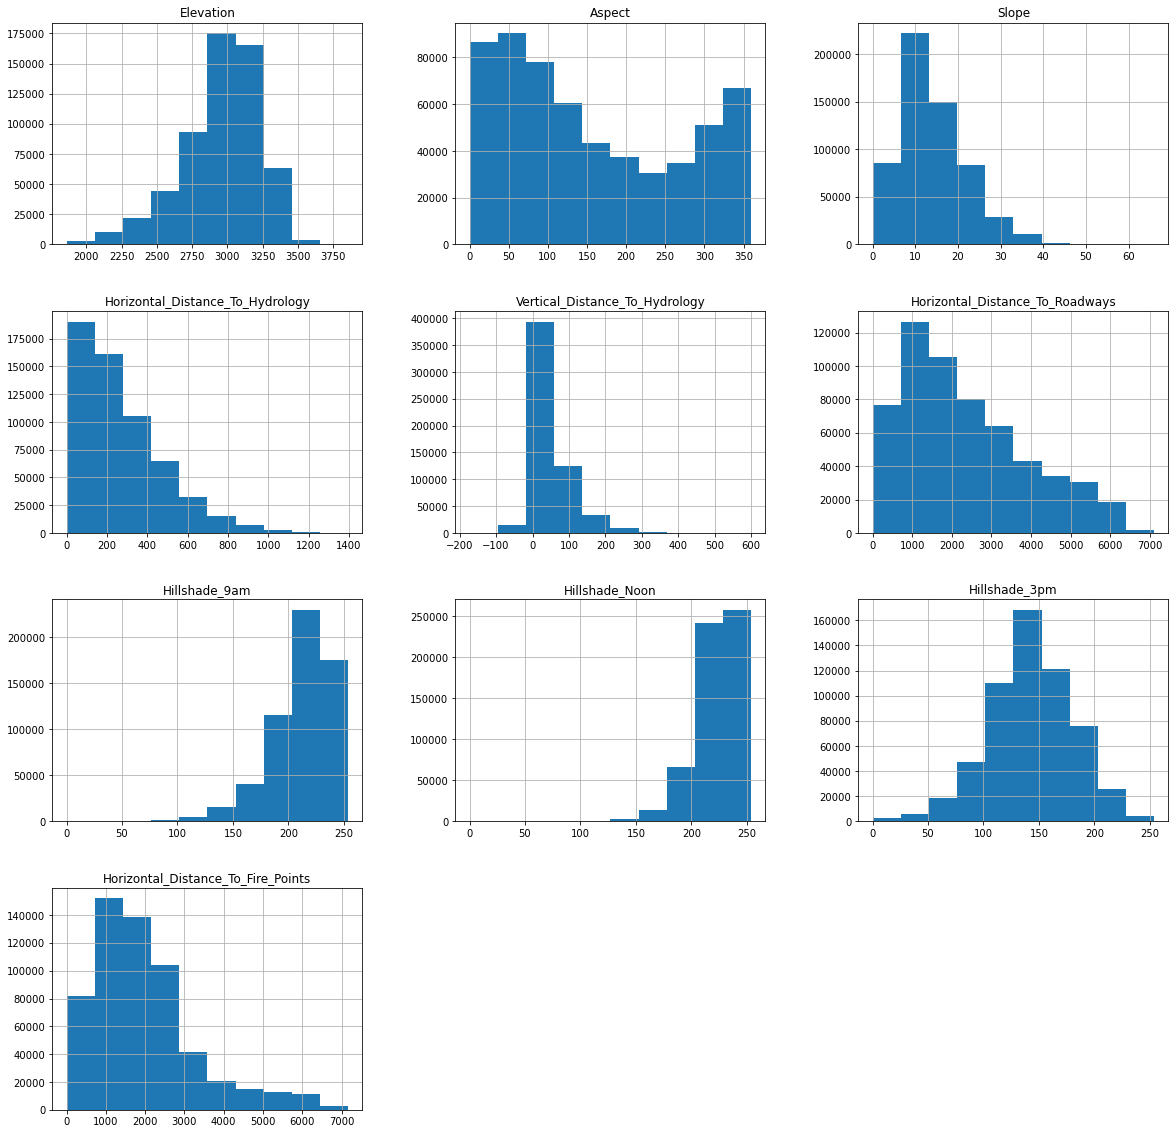

In [39]:
project_quant.hist(figsize=(20,20))
plt.savefig("covtype.histograms.png", format='png', dpi=72)
plt.show()

**5f.** Explain why it is important to examine the histogram of each quantitative column (3 pts).

**5g.** Use the Seaborn [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function to gererate a scatterplot of every quantitative column (excluding the 40 binary soil type columns) with every other quantitative column.  Use `Cover_Type` as the `hue` argument, use `"kde"` as the `diag_kind` argument, and use `5` as the `height` argument.  Because each scatterplot will be small we need to limit the size and number of points. Otherwise, the points overlap which and will hide the color of those behind.  Include only 1000 randomly selected rows from the dataset.  To further improve the plot we can set the size of the point size using the `plot_kws` argument.  Set it using the dictionary: `{"s": 15}`.

Hint: 
- Use the `qual_cols` argument to only include the list of columns you want to plot.
- Use the `sample` function to limit the number of points.

The plot will be huge! You can view it in the notebook but it will be difficult to read the labels. Therefore, save the figure to a file named `covtype.pairplot.png` for viewing. It will take a few minutes to display the plot.

(5 pts)

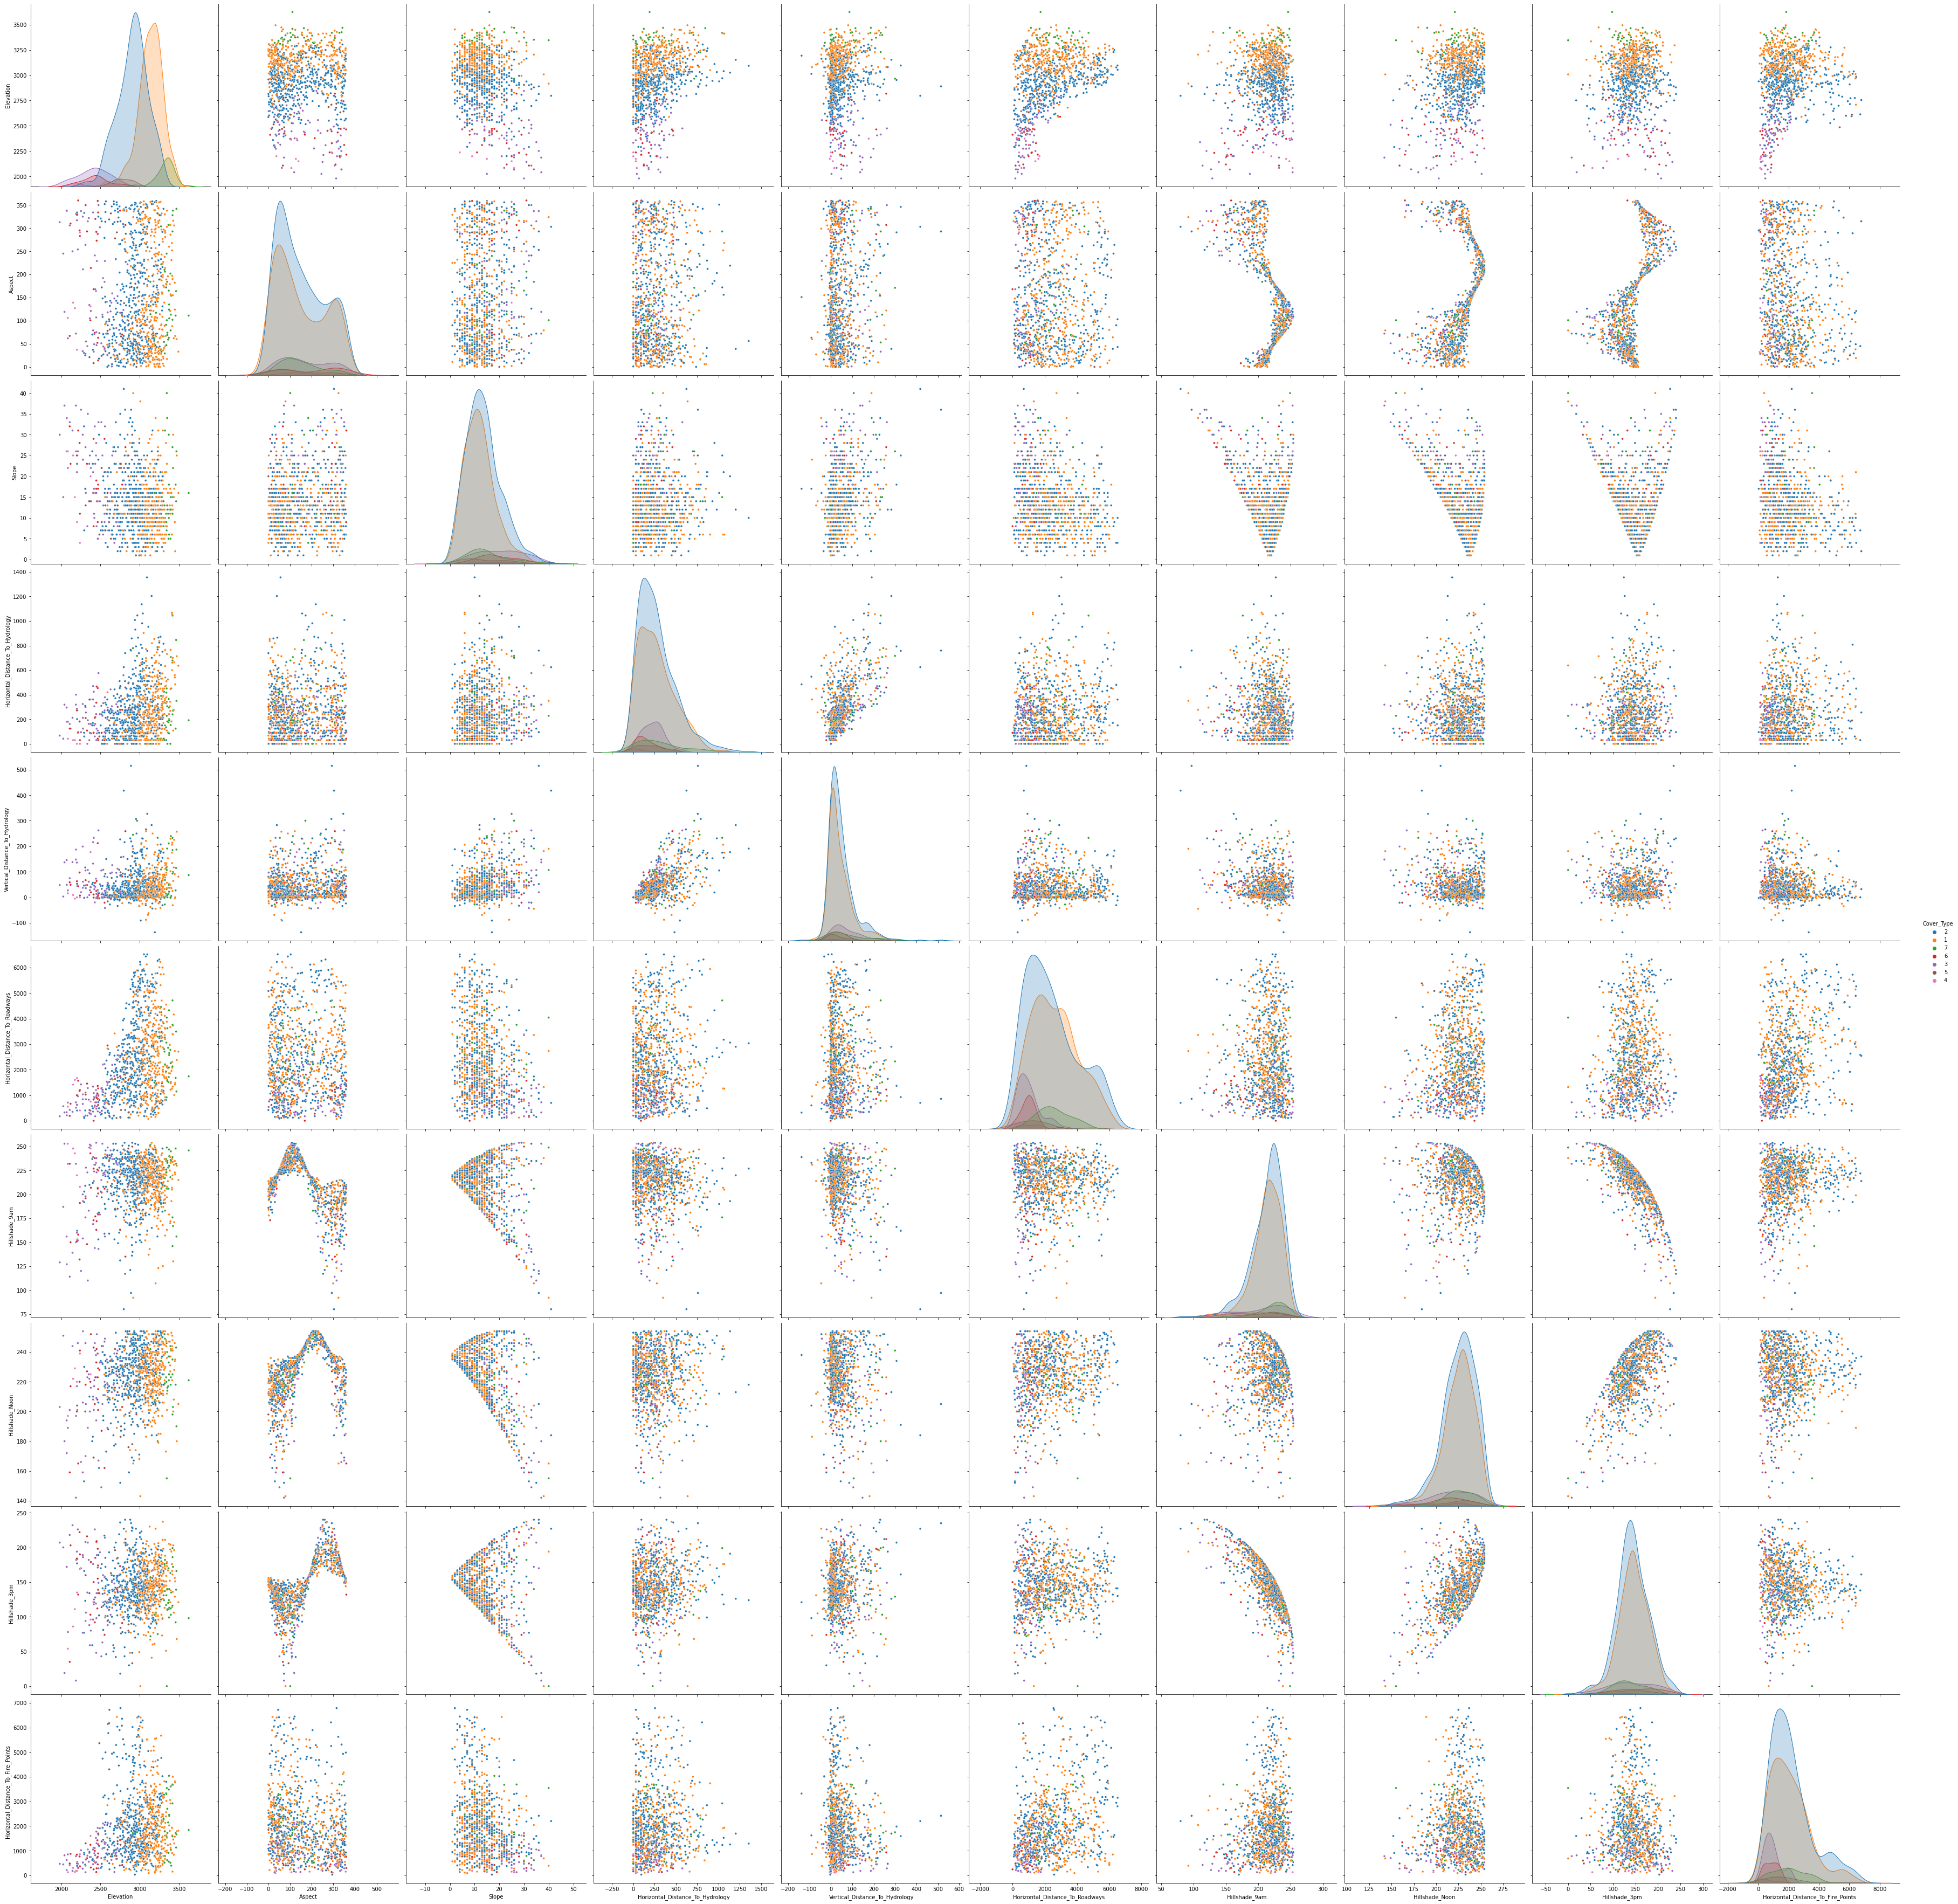

In [49]:
sns_plot = sns.pairplot(project_quant.sample(1000), hue='Cover_Type', diag_kind='kde', height = 5, plot_kws = {"s": 15})
sns_plot.savefig('covtype.pairplot.png', format='png', dpi=72)
plt.show()

**5h.** Explain why it is important to examine the pairwise scatterplots of all quantitative columns  (3 pts).

**5i.** Create 10 figures such that each figure corresponds to a single quantitative column in the data.  Each figure should contain 7 boxplots, one for each cover type, and should have a title indicating the quantitative column it describes. Save each figure using the naming scheme: `covtype-{column_name}.boxplot.png`. Replace the tag `{column_name}` with the name of the column represented by the figure.  Exclude outliers from the plots.

Hints: 
1. First, group the dataframe by `Cover_type`
2. Second, loop over all the names of quantitative columns.
3. Third, you can create a boxplot using the dataframe summary statistics:
   ```python
   # Create a boxplot using the descriptive summary of the data and the built-in plot function
   # of dataframes.
   df.describe().transpose().plot(kind="box", title="my plot", showfliers=False, rot=90);
   ```
4. Because you will use the `DataFrame.plot` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function to save each plot. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.
5. Do not limit the numer of rows as in the pairplot.

(10 pts)

**5j.** Explain why it is important to review the distribution of the "Cover_Type" column with every other quantitative data column (3 pts).

### 5.3 Check for outliers

**5k.** Identify if any quantitative columns have outliers. Do this by generating a **single** figure containing one boxplot for each quantitative column (excluding the 40 binary soil type columns). Save the figure as `covtype-outlier_check.png`. Unlike the previous 10 figures you do not need to create separate boxplots by cover type (5 pts).

**5l.** Explain why it is important to look for outliers prior to using machine learning techniques (3 pts).

---
## 6. Make assumptions

**6a.** Explain which columns of data would be poor predictors of cover type. Justify your answer by referring to the plots from Section 5 (3 pts).

**6b.** Write which columns you expect can contribute to prediction of cover type? (3 pts).

---
## 7. Perform Supervised Machine Learning
### 7.1 Prepare the Data

**7a.** Create a subset of the original data that contains only the columns you indicated in task 6b and the `Cover_Type` column.  Print the list of remaining columns to verify the dataframe has the columns you want to keep:

Hint:
- Drop all column from the dataset not deemed predictive.

(3 pts)

**7b.** For machine learning we need to separate the column containing our dependent variable `Cover_Type` from the independent variables.  Create a Numpy array containing the dependent variable `Cover_Type`. Name it `Y` (3 pts).

**7c.** Create a 2D numpy array containing only the independent variables (i.e. all of the predictive columns). Name it `X` (3 pts).

### 7.2 Normalize the data
Many machine learning algorithms expect that the quantitative columns have a mean centered at 0 with data points scaled to unit variance.  See the [preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) for Sklearn.

**7d**.  Normalize the `X` dataframe using the [preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale) or [preprocessing.robust_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale) function of Sklearn. Choose the method most appropriate given the state of outliers in the data. (5 pts).

### 7.3 Split the data for testing and validation

**7e.** Use Sklearn to create a testing model by dividing the two numpy arrays into two groups, one with 80%, which will be used for training the models, and one with 20%, which will be used for validating the models.  A random seed is required. Use a seed  of `7`.  Name your trainig sets `Xt` and `Yt` and the validation sets `Xv` and `Yv` respectively (3 pts).

**7f.** We want to perform a 10-fold cross-validation scheme to estimate accuracy.  This will split our training dataset into 10 pieces, train on 9, test on 1 and repeat for all combinations.  Create a KFold model object for use later when running the machine learning alogrithms. Use a random state seed of `7`.  Name the KFold object `kfold` (3 pts).

### 7.3 Evaulate ML approaches
Using the training data created in task 7e and the KFold model created in task 7f, we will now execute a variety of ML algorithms.

**7g**. First, we want to store the results of all ML algorithms that we'll be using. Remember we'll be performing  a 10-fold cross-validation scheme so this will yield 10 results for each algorithm.   You will store the results of each ML algorithm into its approriate element of the dictionary.  Execute the following code to initialize a python dictionary where results will be stored.

```python
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}
```
(3 pts)

**7h.** Create two variables. One named `scoring` and the other `error_score`.  Set the value of `scoring` to `"accuracy"` and the `error_score` to `np.nan`. You will use these two variables for model section of every ML method below (3 pts).

**7i.** Execute the `LogisticRegression` algorithm and save the results in the `results` dictionary.  Use the following arguments:  `solver` as `"lbfgs"` and  `multi_class` as `"auto"` (3 pts).

**7j.** Execute the `KNeighborsClassifier` algorithm and save the results in the `results` dictionary (3 pts).

**7k.** Execute the `LinearDiscriminantAnalysis` algorithm and save the results in the `results` dictionary (3 pts).

**7l.** Execute the `DecisionTreeClassifier` algorithm and save the results in the `results` dictionary (3 pts).

**7m.** Execute the `GaussianNB` algorithm and save the results in the `results` dictionary (3 pts).

**7n.** Execute the `SVC` algorithm and save the results in the `results` dictionary. Use `auto` as the the `gamma` arument (3 pts).

**7o.** Create a figure of boxplots that shows the distribution of results from each method. Save the figure using the name `covtype.ML_results.png` (5 pts).

**7p.** Write which algorithm you feel performed the best and explain (3 pts).

### 7.4 Make Predictions!

**7q.** Using the algorithm that performs the best, use it to make a prediction using the `Xv` validation we set aside earlier (5 pts).

**7r**.  Show the accuracy score of the prediction (4 pts).

**7s** Show the confusion matrix.  Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

**7t.** Print the classifcation report. Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

## 8. Summarize

**8a**.  Explain in your own words the meaning of the results in last three cells of Section 7. How well did the algorithm perform? (3 pts).

**8b.** Write if there anything you would do differently to try to improve the quality of the prediction (3 pts).